# **Etapas da análise**

<ol type="1">
  <li>Entendendo o Problema</li>
  <li>Importando as bibliotecas;</li>
  <li>download/carregamento/geração de dados;</li>
  <li>Exploração de dados;</li>
  <li>Transformação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Insights Finais</li>
</ol>

# 1. Entendendo o problema.
Iremos analisar uma base de dados de crédito de uma instituição financeira disponibilizada no Kaggle.
O campo default é a variável dependente que indica inadimplência e iremos analisar o comportamento dos outros campos e tentar identificar algum padrão, assim como também quais os campos tem mais relevância.

# 2\. Importando as Bibliotecas
Nesta Etapa, iremos importar as bibliotecas necessárias para nossa análise.
Serão utilizadas 4 bibliotecas:


*   pandas (será usada para manipular os dados da base)
*   matplotlib.pyplot (será usada para criar os gráficos)
*   seaborn (será usada para criar os gráficos)
*   os (será utilizada para criar/excluir diretórios onde serão armazenadas as imagens dos gráficos gerados.)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_style("whitegrid")

# 3\. Carregando os arquivos para análise.


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv',delimiter=',', encoding='utf8', na_values=['','na'])
df.head(5)

# 4\. Explorando os dados
Nesta Etapa, iremos verificar a estrutura dos dados, o esquema e também a existência de dados duplicados faltantes ou irrelevantes.

In [ ]:
#Verificando o número de linhas e colunas.
total_registros, _  = df.shape
print(total_registros)

In [ ]:
total_adimplentes, _ =df[df['default'] == 0].shape
total_inadimplentes, _ = df[df['default'] == 1].shape

print(f'O número de adimplentes ({total_adimplentes}) representa {round((total_adimplentes/total_registros * 100),2)}% do total dos registros({total_registros}) ')
print(f'O número de inadimplentes ({total_inadimplentes}) representa {round((total_inadimplentes/total_registros * 100),2)}% do total dos registros({total_registros}).')

In [ ]:
#Verificando se existe alguma linha duplicada ou se o id de usuário se repete
print(df.duplicated().any())
print(df.duplicated('id').any())
# Não há linhas repetidas

In [ ]:
#Verificando o schema
df.dtypes
#Identificados campos de valores com o tipo object

In [ ]:
#Verificando as estatísticas das variáveis numéricas
df.drop('id', axis =1).select_dtypes('number').describe().transpose()

In [ ]:
#Verificando as estatísticas das variáveis categóricas
df.select_dtypes('object').describe().transpose()

In [ ]:
#Definição de função que recebe um dataframe para verificar os registros com dados ausentes.
def stat_dataframes(df : pd.DataFrame) -> None:
  for coluna in df.select_dtypes('object').columns:
    total, _ =df.shape
    faltantes = df[coluna].isna().sum()
    if faltantes > 0:
      print(f'Culuna {coluna} com {faltantes} registros com valor na e representa {round(faltantes/total*100,2)}% do total de registros desse dataframe')


In [ ]:
# Verificando a quantidade de registros com dados ausentes e quanto representam do dataframe total
stat_dataframes(df)

In [ ]:
# Verificando a quantidade de registros com dados ausentes e quanto representam do dataframe Adimplentes
stat_dataframes(df[df['default'] ==0])

In [ ]:
# Verificando a quantidade de registros com dados ausentes e quanto representam do dataframe Inadimplentes
stat_dataframes(df[df['default'] ==1])

#Conclusão : Como os percentuais foram mantidos praticamente iguais para os adimplentes e inadimplentes, podemos retirar estas linhas pois ambas as amostras terão o mesmo impacto.

# 5\. Limpeza e Transformação dos dados.

In [ ]:
#Transformação dos dados:
#Correção do schema
df[['limite_credito','valor_transacoes_12m']]
df['limite_credito'] = df['limite_credito'].apply(lambda x : x.replace('.','').replace(',','.')).astype('float')
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(lambda x : x.replace('.','').replace(',','.')).astype('float')

In [ ]:
#Verificando se o schema foi corrigido
df.dtypes

In [ ]:
# Verificando as estatísticas das variáveis categóricas
df.select_dtypes('object').describe().transpose()

In [ ]:
# Verificando as estatísticas das variáveis numéricas
df.drop('id',axis=1).select_dtypes('number').describe().transpose()

In [ ]:
#Retirando os valores nulos
df.dropna(inplace = True)

In [ ]:
# Verificando as novas estatísticas
display(df.drop('id',axis=1).select_dtypes('number').describe().transpose())

print('\n')

df.drop('id',axis=1).select_dtypes('object').describe().transpose()
#É possível observar que não houve impacto considerável nas estatísticas das variáveis numéricas após as exclusão das linhas.
# Para as variáveis categóricas, é possível notar que a maioria das linhas exluídas tinham registros com o campo sexo = "F" já que a maior frequencia para este campo mudou
# Como o campos sexo não será utilizado na análise, não há problemas no que foi constatado no tratamento dos dados


Comparação das estatísticas das variáveis antes e depois do tratamento dos dados.

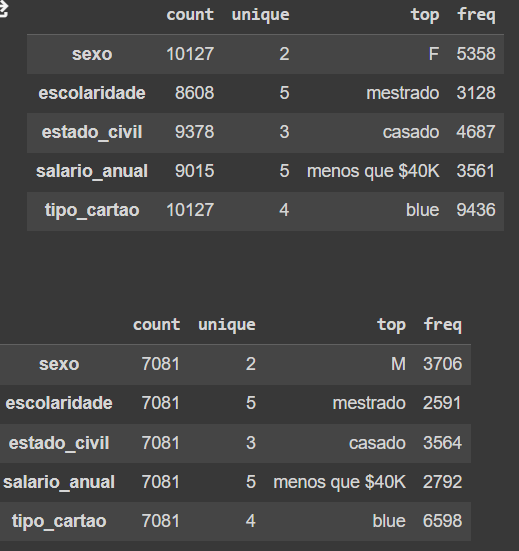
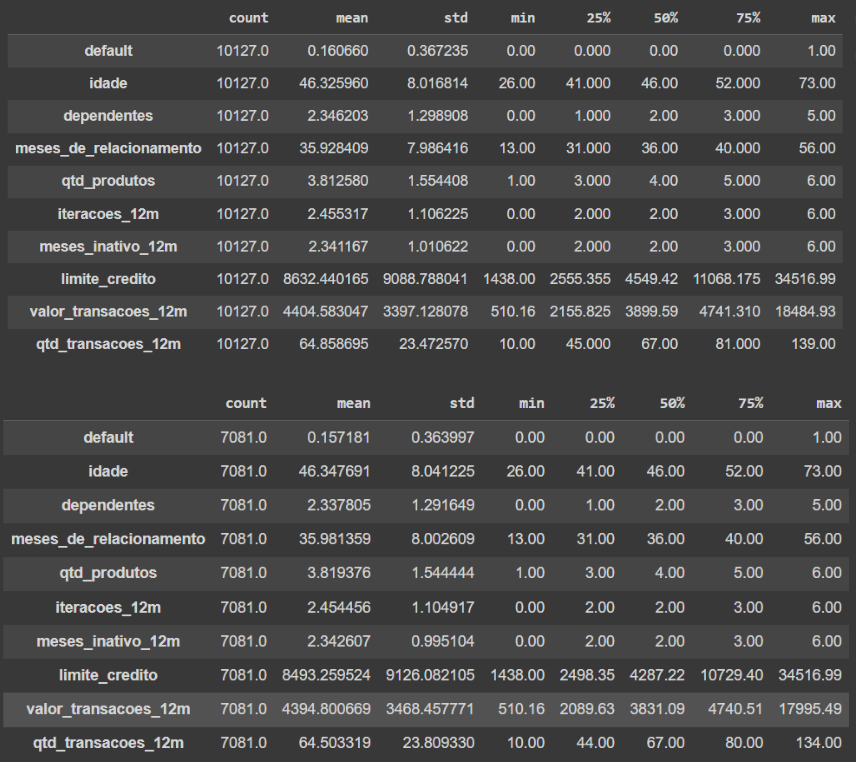

In [ ]:
#Comparando os percentuais de adimplentes e inadimplentes antes e depois da limpeza e transformação.
novo_total, _ = df.shape
novo_adimplente, _ = df[df['default'] == 0].shape
novo_inadimplente, _ = df[df['default'] == 1].shape

percent_adimplente = round(novo_adimplente/novo_total*100,2)
percent_inadimplente = round(novo_inadimplente/novo_total*100,2)
print(f'Antigo total de registros: {total_registros}\nAntigo total de adimplentes: {total_adimplentes}. Representa {round(total_adimplentes/total_registros*100,2)}% do antigo total.\nAntigo total de inadimplentes: {total_inadimplentes}. Representa {round(total_inadimplentes/total_registros*100,2)}% do antigo total')
print('\n')
print(f'Novo total de registros: {novo_total}\nNovo total de adimplentes: {novo_adimplente}. Representa {percent_adimplente}% do novo total.\nNovo total de inadimplentes: {novo_inadimplente}. Representa {percent_inadimplente}% do novo total')

# 6\. Análise dos dados com Visualização

In [ ]:
#Preparando so dataframes para a visualização
df = df.drop(['sexo','id'], axis=1)
df_adimplentes = df[df['default'] == 0]#.drop(['sexo','id'], axis=1)
df_inadimplentes = df[df['default'] == 1]#.drop(['sexo','id'], axis=1)

print('Adimplentes:')
display(df_adimplentes.head(5))
print('Inadimplentes:')
display(df_inadimplentes.head(5))

print('Adimplentes:')
display(df_adimplentes.select_dtypes('object').describe().transpose())
print('Inadimplentes:')
df_inadimplentes.select_dtypes('object').describe().transpose()

Definição de função para gerar os gráficos para cada variável categórica e outra função para variáveis numéricas.
A função recebe um dataframe padrão, uma lista de dataframes, uma lista de títulos e uma string com o nome padrão dos arquivos

*   O primeiro parâmetro é um dataframe padrão. Com base neste dataframe, serão selecionadas as variáveis categóricas que serão comparadas nos outros dataframes.
*  O segundo parâmetro, será utilizado para que os gráficos sejam gerados para cada dataframe da lista.

*   O terceiro parâmetro será utilizado para customizar os títulos dos arquivos que serão armazenados.
*   O último parâmetro é uma string com o caminho e nome do arquivo que será gerado

In [ ]:
def compara_categoricas_df(df_padrao:pd.DataFrame, lst_dfs: list, titulos_f: list,arq: str ) -> None:
  titulos = titulos_f
  lst_col = df_padrao.select_dtypes('object').columns

  for col in lst_col:
    eixo = 0
    max_y = 0
    max = df_padrao.select_dtypes('object').describe()[col]['freq'] * 1.1

    figura, eixos = plt.subplots(1,len(lst_dfs), figsize=(25, 10), sharex=True)

    for data in lst_dfs:

      #Cria um Dataframe apenas com a coluna de interesse e sua frequencia
      df_to_plot = data[col].value_counts().to_frame()  
      df_to_plot.rename(columns={'count': 'frequencia_absoluta'}, inplace=True)
      df_to_plot[col] = df_to_plot.index
      df_to_plot.reset_index(drop=True,inplace = True)
      df_to_plot.sort_values(by=[col], inplace=True)
     

      # gera o gráfico e adicona no eixo criado acima.
      f = sns.barplot(x=df_to_plot[col], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
      f.set(title= f'{col} dos clientes {titulos[eixo]}', xlabel=col.capitalize(), ylabel='Frequência Absoluta')
      f.set_xticklabels(labels=f.get_xticklabels(), rotation=15)

      #Executar sem o bloco abaixo ajudou a identificar os padões de comportamento semelhantes de forma mais clara. Após ajustar a escala do gráfico, ainda é possível notar a semelhança no comportamento,porém de forma menos visível.
      _, max_y_f = f.get_ylim()
      max_y = max_y_f if max_y_f > max_y else max_y
      f.set(ylim=(0, max_y))
      eixo += 1

    figura.show()
    if not os.path.exists('./categoricas'):
      os.makedirs('./categoricas')
    figura.savefig(fname = f'./categoricas/comparação da coluna {col} nos dataframes {arq}.png')




Também criamos uma função para facilitar a exclusão de arquivos e pastas durante o desenvolvimento da análise.
Esta função recebe o caminho da pasta como parâmetro e exclui todos os arquivos desta pasta e depois exclui a própria pasta.

In [ ]:
# Função criada apenas para facilicar a exclusão de pastas
def remover_pasta(caminho:str) -> None:
  try:
    with os.scandir(caminho) as ts:
      for i in ts:
        if i.is_file():
          os.remove(i)
    os.rmdir(caminho)
  except FileNotFoundError as exc:
    print(f'O diretório "{caminho}" não existe.')
#for i in os.listdir('./relplot'):
  #print(i.is_file() )

In [ ]:
remover_pasta('./relplot/relevantes')

In [ ]:
#Gerando os gráficos de comparação.
titulos = ['Total', 'Adimplentes', 'Inadimplentes']
lst_dataframes = [df, df_adimplentes, df_inadimplentes]
nomes_arquivos = "'df', 'df_adimplentes'e'df_inadimplentes'"
compara_categoricas_df(df,lst_dataframes,titulos,nomes_arquivos)


As imagens demonstram o mesmo padrão de comportamento para as variáveis nos dataframes de Adimplentes e Inadimplentes.
Desta forma, não continuaremos analisando estas variavéis.

In [ ]:
#Análise das variáveis numéricas
def compara_numericas_df(df_padrao:pd.DataFrame, lst_dfs: list, titulos_f: list,arq: str ) -> None:
  titulos = titulos_f
  lst_col = df_padrao.select_dtypes('number').columns

  for col in lst_col: # ParÂmetro da função
    eixo = 0
    max_y = 0
    #max = df_padrao.select_dtypes('number').describe()[col]['freq'] * 1.1
    if col != 'default':
      figura, eixos = plt.subplots(1,len(lst_dfs), figsize=(20, 5), sharex=True)

      for data in lst_dfs:
        # gera o gráfico e adicona no eixo criado acima.
        f = sns.histplot(x=data[col], data = data , stat = 'count', ax=eixos[eixo])
        f.set(title= f'{col} dos clientes {titulos[eixo]}', xlabel=col.capitalize(), ylabel='Frequência Absoluta')

        #Executar sem o bloco abaixo ajudou a identificar os padões de comportamento semelhantes de forma mais clara. Após ajustar a escala do gráfico, ainda é possível notar a semelhança no comportamento,porém de forma menos visível.
        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))
        eixo += 1

        figura.show()
        if not os.path.exists('./numericas'):
          os.makedirs('./numericas')
        figura.savefig(fname = f'./numericas/comparação da coluna {col} nos dataframes {arq}.png')

In [ ]:
titulos = ['Total', 'Adimplentes', 'Inadimplentes']
lst_dataframes = [df, df_adimplentes, df_inadimplentes]
nomes_arquivos = "'df', 'df_adimplentes'e'df_inadimplentes'"
compara_numericas_df(df,lst_dataframes,titulos,nomes_arquivos)


Com base nas imagens acima, é possível identificar que as variáveis "Qtd_transacoes_12m" e "Valor_transacoes_12m" apresentaram comportamento mais divergente entre os dataframes de Adimplentes e Inadimplentes.

In [ ]:
lista = list(filter(lambda x : x != 'default',df.select_dtypes('number').columns))
lista

Neste momento, iremos analisar a relação  das variáveis numéricas para o dataframe de inadimplentes para tentar identificar algum padrão.
Para isto, iremos definir uma fução que irá gerar os gráficos de relacionamento entre as variáveis. A função recebe 2 parâmetros. O primeiro parâmetro é uma lista, onde informaremos a lista de variáveis para os quais serão criados os gráficos. O segundo parâmetro é uma string com o caminho e nome do arquivo.

In [ ]:
# Função para gerar os gráficos de relacionamento de uma variável com outra para cadas variável numérica.
def graficos_rel(lista: list,caminho: str) -> None:
  eixoy_atual = 1
  for coluna in lista:
    if eixoy_atual < len(lista):
      for item in lista[eixoy_atual:]:
        #print(f'{coluna}, {item}')
        f = sns.relplot(x=coluna, y=item, data=df, hue='default')
        _ = f.set(
          title=f'Relação entre {coluna} e {item}',
          xlabel=f'{coluna}',
          ylabel=f' {item}'
        )
        if not os.path.exists(caminho):
          os.makedirs(caminho)
        f.savefig(fname = f'{caminho}/Relação da variável {coluna} com a variavel {item}.png')
    eixoy_atual +=1

In [ ]:
graficos_rel(lista, './relplot/inicial')

Observando os gráficos acima, identificamos que algumas variáveis apresentaram resultados mais expressivos. Então iremos gerar novamente os gráficos envolvendo apenas estas.

In [ ]:
#Avaliando apenas as combinações mais expressivas
ref =  ['default', 'idade', 'dependentes', 'meses_de_relacionamento','qtd_produtos']

lista = list(filter(lambda x : x not in ref ,df.select_dtypes('number').columns))
lista
#Nova lista apenas variáveis com as mais expressivas.

In [ ]:
graficos_rel(lista, './relplot/relevantes')

Ao verificar novamente as variáveis, identificamos que 3 váriáveis quando relacionadas resultaram em gráficos bem expressivos em relação à distribuição de inadimplentes.

In [ ]:
lf =   ['valor_transacoes_12m', 'qtd_transacoes_12m']
remover_pasta('./relplot/final')
graficos_rel (lf,'./relplot/final')

In [ ]:
#Analisando o percentual de cada variável indivisualmente dentro dos intervalos identificados.
vl = 3000
intervalo = [7500,10000]

tot_i,_ = df_inadimplentes.shape

df_i_vl = df_inadimplentes[df_inadimplentes['valor_transacoes_12m']<= vl]

df_i_vl2 = df_inadimplentes[(df_inadimplentes['valor_transacoes_12m'] >= intervalo[0]) & (df_inadimplentes['valor_transacoes_12m']<= intervalo[1])]


tot_i_vl, _ = df_i_vl.shape
tot_i_vl2,_ = df_i_vl2.shape
print(f'{round((tot_i_vl/tot_i *100),2)}% dos inadimplentes tem suas transações com valores de até {vl} nos últimos 12 meses.')

print(f'{round((tot_i_vl2/tot_i *100),2)}% dos inadimplentes tem suas transações com valores entre {intervalo[0]} e {intervalo[1]} nos últimos 12 meses.\n')

# ------------------------------------------------------------------------------------
intervalo_qtd = [20,60]

df_i_qtd = df_inadimplentes[(df_inadimplentes['qtd_transacoes_12m'] >= intervalo_qtd[0]) & (df_inadimplentes['qtd_transacoes_12m']<= intervalo_qtd[1])]
tot_i_qtd = df_i_qtd.shape[0]

print(f'{round((tot_i_qtd/tot_i *100),2)}% dos inadimplentes tem entre {intervalo_qtd[0]} e {intervalo_qtd[1]} transações nos últimos 12 meses.')

intervalo_qtd2 = [60,90]

df_i_qtd2 = df_inadimplentes[(df_inadimplentes['qtd_transacoes_12m'] >= intervalo_qtd2[0]) & (df_inadimplentes['qtd_transacoes_12m']<= intervalo_qtd2[1])]
tot_i_qtd2 = df_i_qtd2.shape[0]

print(f'{round((tot_i_qtd2/tot_i *100),2)}% dos inadimplentes tem entre {intervalo_qtd2[0]} e {intervalo_qtd2[1]} transações nos últimos 12 meses.\n')

#----------------------------------------------------------------------------

intervalo_limite = [1500,5000]
df_i_limite = df_inadimplentes[(df_inadimplentes['limite_credito'] >= intervalo_limite[0]) & (df_inadimplentes['limite_credito']<= intervalo_limite[1])]
tot_i_limite = df_i_limite.shape[0]

print(f'{round((tot_i_limite/tot_i *100),2)}% dos inadimplentes tem entre {intervalo_limite[0]} e {intervalo_limite[1]} de limite de crédito.')

# Para a variavel limite_credito, analisada individualmente, não foi possível estabelecer faixas, apenas um limite.


In [ ]:
#valor menor que 3000 e quantidade de transações nos últimos 12 meses entre 25 e 60
print('Análise do gráfico Final\n')
df_i_vl_qtd = df_inadimplentes[(df_inadimplentes['valor_transacoes_12m']<= vl)  & (df_inadimplentes['qtd_transacoes_12m'] >= intervalo_qtd[0]) & (df_inadimplentes['qtd_transacoes_12m']<= intervalo_qtd[1])]
tot_i_vl_qtd = df_i_vl_qtd.shape[0]

#Representa a análise do gráfico 3
print(f'{round((tot_i_vl_qtd/tot_i *100),2)}% dos inadimplentes tem suas transações com valores de até {vl}  e {intervalo_qtd[0]} a {intervalo_qtd[1]} transações nos últimos 12 meses.')



df_i_vl_qtd2 = df_inadimplentes[(df_inadimplentes['valor_transacoes_12m'] >= intervalo[0]) & (df_inadimplentes['valor_transacoes_12m']<= intervalo[1]) & (df_inadimplentes['qtd_transacoes_12m'] >= intervalo_qtd2[0]) & (df_inadimplentes['qtd_transacoes_12m']<= intervalo_qtd2[1])]
tot_i_vl_qtd2 = df_i_vl_qtd2.shape[0]


print(f'{round((tot_i_vl_qtd2/tot_i *100),2)}% dos inadimplentes tem suas transações com valores entre {intervalo[0]} e {intervalo[1]}  e entre {intervalo_qtd2[0]} e {intervalo_qtd2[1]} nos últimos 12 meses.')

# 7\. Insights

*   As variáveis categóricas apresentaram comportamento semelhante para os dataframes Adimplentes e Inadimplentes. Desta forma não demonstram impacto na análise.
*  Analisando as variáveis numéricas individualmente por meio dos histogramas, apenas duas delas apresentaram comportamento diferentes de forma expressiva entre os dataframe Adimplentes e Inadimplentes, sendo elas "valor_transacoes_12m" e "qtd_transacoes_12m".


*   Para essas duas variáveis, utilizando o gráfico de relacionamento entre elas, foi possível identificar 2 grupos em que se concentram os inadimplentes.
 * 71,88% dos inadimplentes tem suas transações com valores de até 3000 e de 20 a 60 transações nos últimos 12 meses (Valores baixos e quantidade de tansações razoavel).
 * 10,69% dos inadimplentes tem suas transações com valores entre 7500 a 10000 e 60 a 90 transações nos últimos 12 meses (valor entre 7500 e 10000 e quntidade media de tranzações).

